In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as const

from periodictable import elements

In [2]:
def getMostAbundentIsotope(element):    
    abundent_isotope = None
    
    for isotope in element._isotopes.values():
        if (abundent_isotope == None):
            abundent_isotope = isotope
        elif (abundent_isotope._abundance < isotope._abundance):
            abundent_isotope = isotope

    return abundent_isotope

def calculateNuclearBindingEnergy(element, isotope):
    protons = element.number
    neutrons = isotope.isotope - protons
    atomic_mass = isotope._mass
    
    atomic_mass *= const.u
    proton_mass = protons * const.m_p
    neutron_mass = neutrons * const.m_n
    
    mass_defect = (proton_mass + neutron_mass) - atomic_mass 
    
    # energy is E=mc**2
    energy = (mass_defect * const.c**2).to(u.MeV)
    energy_per_nucleon = energy / (protons+neutrons)
    return energy, energy_per_nucleon


In [3]:
symbol = []
Z = []
A = []
mass_nucleus = []
energies = []
energies_per_nucleon = []

for element in elements:
    # Skip neutron.
    if (element == elements.n):continue
        
    isotope = getMostAbundentIsotope(element)
    
    energy, energy_per_nucleon = calculateNuclearBindingEnergy(element, isotope)
    
    symbol.append(element.symbol)
    Z.append(element.number)
    A.append(isotope.isotope)
    mass_nucleus.append(isotope._mass)
    energies.append(energy.value)
    energies_per_nucleon.append(energy_per_nucleon.value)
    
data = {'Symbol': symbol, 'Z': Z, 'A': A, 'mass_nucleus': mass_nucleus, 'energy_mev':energies, 'energy_per_nucleon_mev': energies_per_nucleon}
df = pd.DataFrame(data)

# Remove rows with atomic mass == 0.  Some of the last elements in the table have this condition.
df = df[df.mass_nucleus != 0]

# Sort the list by atomic mass.
df = df.sort_values(by='A')




In [4]:
df.head(10)

,Symbol,Z,A,mass_nucleus,energy_mev,energy_per_nucleon_mev
0,H,1,1,1.007825,-0.510986,-0.510986
1,He,2,4,4.002603,27.273696,6.818424
2,Li,3,7,7.016004,37.711598,5.387371
3,Be,4,9,9.012182,56.120979,6.235664
4,B,5,11,11.009305,73.649819,6.695438
5,C,6,12,12.000000,89.095823,7.424652
6,N,7,14,14.003074,101.081709,7.220122
7,O,8,16,15.994915,123.531430,7.720714
8,F,9,19,18.998403,143.202463,7.536972
9,Ne,10,20,19.992440,155.534970,7.776749


In [5]:
# Max should be Fe-56
df.loc[df.energy_per_nucleon_mev.idxmax()]

Symbol                            Fe
Z                                 26
A                                 56
mass_nucleus               55.934942
energy_mev                478.968223
energy_per_nucleon_mev      8.553004
Name: 25, dtype: object

In [6]:
# Well known elements
helium_4 = df.loc[df['Symbol'] == 'He']
lithium_7 = df.loc[df['Symbol'] == 'Li']
carbon_12 = df.loc[df['Symbol'] == 'C']
oxygen_16 = df.loc[df['Symbol'] == 'O']
magnesium_24 = df.loc[df['Symbol'] == 'Mg']
iron_56 = df.loc[df['Symbol'] == 'Fe']
krypton_84 = df.loc[df['Symbol'] == 'Kr']
uranium_238 = df.loc[df['Symbol'] == 'U']


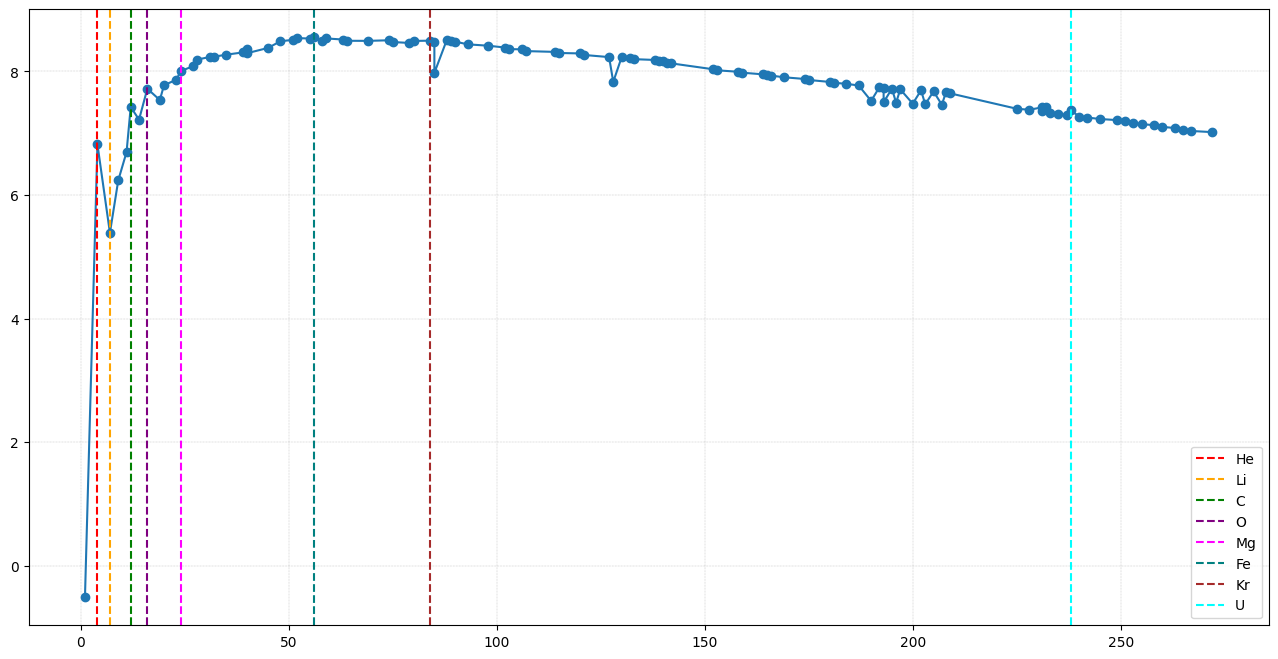

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.plot(df.A, df.energy_per_nucleon_mev, marker='o')

ax.axvline(helium_4.A.values[0], color='red', linestyle='--', label=helium_4.Symbol.values[0])
ax.axvline(lithium_7.A.values[0], color='orange', linestyle='--', label=lithium_7.Symbol.values[0])
ax.axvline(carbon_12.A.values[0], color='green', linestyle='--', label=carbon_12.Symbol.values[0])
ax.axvline(oxygen_16.A.values[0], color='purple', linestyle='--', label=oxygen_16.Symbol.values[0])
ax.axvline(magnesium_24.A.values[0], color='magenta', linestyle='--', label=magnesium_24.Symbol.values[0])
ax.axvline(iron_56.A.values[0], color='teal', linestyle='--', label=iron_56.Symbol.values[0])
ax.axvline(krypton_84.A.values[0], color='brown', linestyle='--', label=krypton_84.Symbol.values[0])
ax.axvline(uranium_238.A.values[0], color='cyan', linestyle='--', label=uranium_238.Symbol.values[0])

ax.legend()

In [8]:
element = elements.He
for attr_name, attr_value in element.__dict__.items():
    print(f"{attr_name}: {attr_value}")

isotope = element._isotopes[4]
for attr_name, attr_value in isotope.__dict__.items():
    print(f"{attr_name}: {attr_value}")


name: helium
symbol: He
number: 2
_isotopes: {3: He[3], 4: He[4], 5: He[5], 6: He[6], 7: He[7], 8: He[8], 9: He[9], 10: He[10]}
ions: (1, 2)
ion: <periodictable.core.IonSet object at 0x1306917e0>
_mass: 4.002602
_density: 0.122
density_caveat: T=-268.93
element: He
isotope: 4
ion: <periodictable.core.IonSet object at 0x1306b22f0>
_mass: 4.0026032497
_abundance: 99.999863
